In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/FinalTask/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
df_train.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/FinalTask/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [ ]:
df_test.isna().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049
AMT_REQ_CREDIT_BUREAU_MON,6049
AMT_REQ_CREDIT_BUREAU_QRT,6049


In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
df_test.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


# EDA

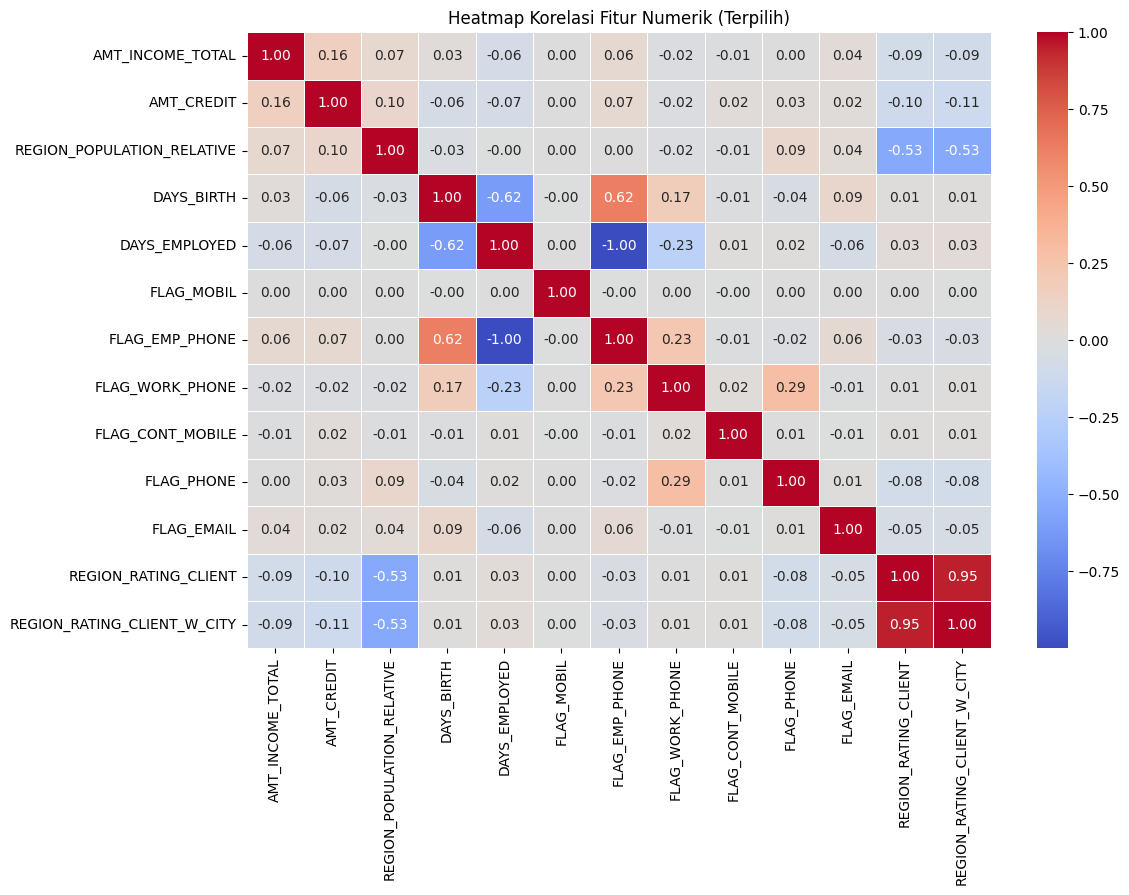

In [ ]:
numerical_columns = df_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
                              'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                              'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                              'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik (Terpilih)')
plt.show()

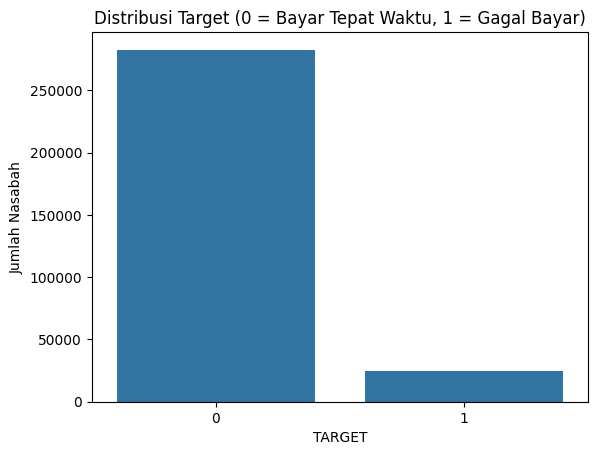

In [ ]:
sns.countplot(x='TARGET', data=df_train)
plt.title("Distribusi Target (0 = Bayar Tepat Waktu, 1 = Gagal Bayar)")
plt.xlabel("TARGET")
plt.ylabel("Jumlah Nasabah")
plt.show()

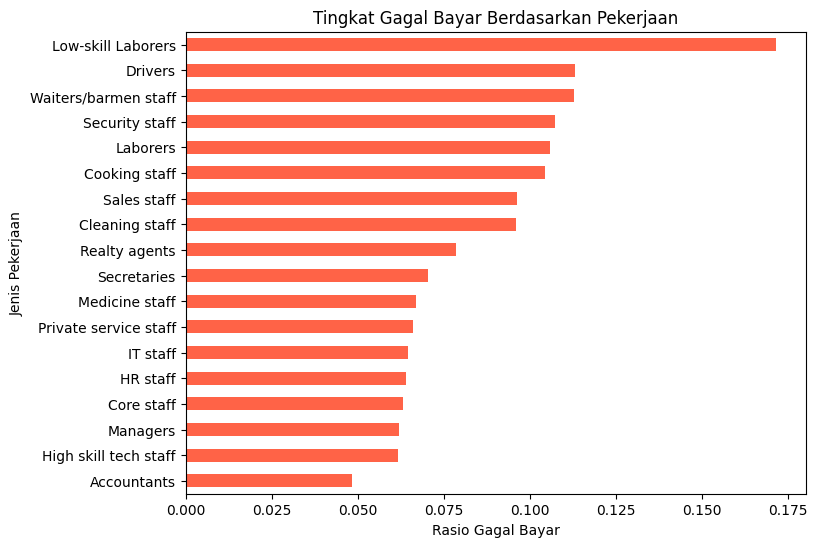

In [ ]:
# Rasio gagal bayar per pekerjaan
default_by_job = df_train[df_train['TARGET'] == 1].groupby('OCCUPATION_TYPE')['TARGET'].count() / df_train.groupby('OCCUPATION_TYPE')['TARGET'].count()
default_by_job = default_by_job.sort_values(ascending=True).dropna()

default_by_job.plot(kind='barh', figsize=(8,6), color='tomato')
plt.title("Tingkat Gagal Bayar Berdasarkan Pekerjaan")
plt.xlabel("Rasio Gagal Bayar")
plt.ylabel("Jenis Pekerjaan")
plt.show()

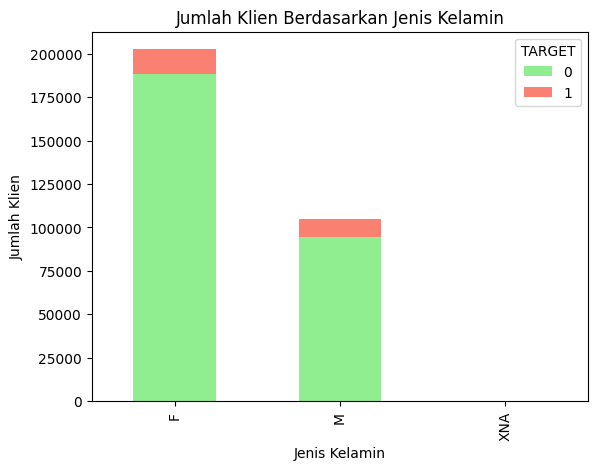

In [ ]:
gender_target = df_train.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()
gender_target.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Jumlah Klien Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Klien')
plt.show()

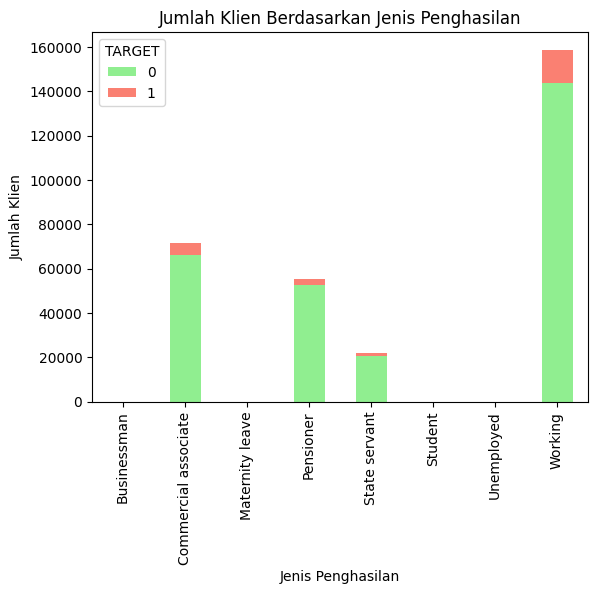

In [ ]:
income_target = df_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()
income_target.plot(kind='bar', stacked= True, color=['lightgreen', 'salmon'])
plt.title('Jumlah Klien Berdasarkan Jenis Penghasilan')
plt.xlabel('Jenis Penghasilan')
plt.ylabel('Jumlah Klien')
plt.show()

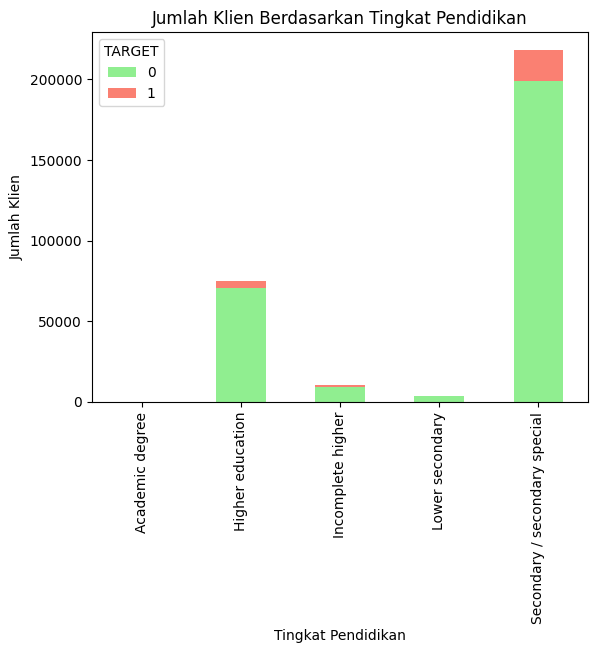

In [ ]:
education_target = df_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts().unstack()
education_target.plot(kind='bar', stacked = True, color=['lightgreen', 'salmon'])
plt.title('Jumlah Klien Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Klien')
plt.show()

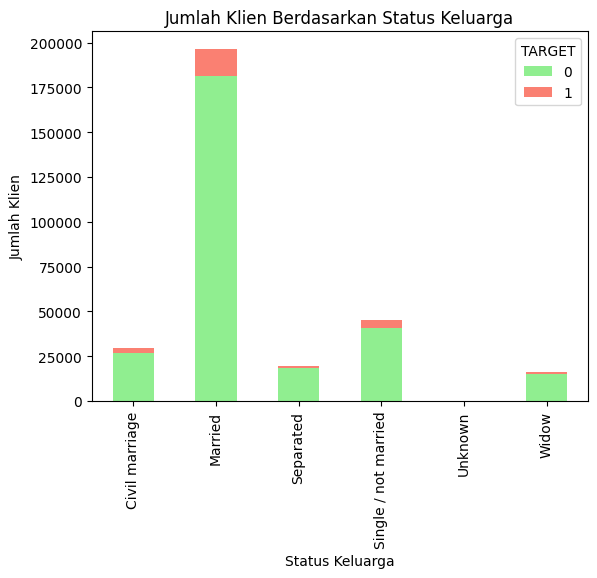

In [ ]:
family_status_target = df_train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack()
family_status_target.plot(kind='bar', stacked = True, color=['lightgreen', 'salmon'])
plt.title('Jumlah Klien Berdasarkan Status Keluarga')
plt.xlabel('Status Keluarga')
plt.ylabel('Jumlah Klien')
plt.show()

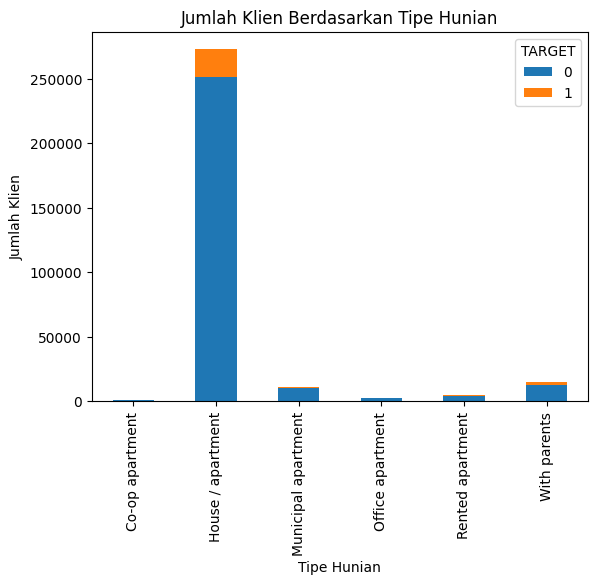

In [ ]:
housing_type_target = df_train.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack()
housing_type_target.plot(kind='bar', stacked=True)
plt.title('Jumlah Klien Berdasarkan Tipe Hunian')
plt.xlabel('Tipe Hunian')
plt.ylabel('Jumlah Klien')
plt.show()

# Data Preprocessing

In [ ]:
df_train.drop(['SK_ID_CURR','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE','OWN_CAR_AGE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_MOBIL', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis=1, inplace=True)

In [ ]:
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.dropna(axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [ ]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH']//365
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].abs()
df_train['DAYS_BIRTH']

,DAYS_BIRTH
0,26
1,46
2,53
3,53
4,55
...,...
307506,26
307507,57
307508,42
307509,33


In [ ]:
label_encoder = LabelEncoder()

df_train['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_train['ORGANIZATION_TYPE'])
df_train['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_train['NAME_HOUSING_TYPE'])
df_train['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_train['NAME_FAMILY_STATUS'])
df_train['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_train['NAME_EDUCATION_TYPE'])
df_train['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_train['NAME_INCOME_TYPE'])
df_train['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_train['FLAG_OWN_REALTY'])
df_train['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['CODE_GENDER'] = label_encoder.fit_transform(df_train['CODE_GENDER'])
df_train['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_train['NAME_CONTRACT_TYPE'])

In [ ]:
scaler = MinMaxScaler()

normalized_train_data = scaler.fit_transform(df_train)

In [ ]:
df_train = pd.DataFrame(normalized_train_data, columns=df_train.columns)
df_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1.0,0.0,0.5,0.0,1.0,0.0,0.001512,0.090287,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.571429,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.5,1.0,1.0,0.0,0.000358,0.022472,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.5,0.0,1.0,0.0,0.000819,0.116854,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.5,0.0,0.0,0.0,0.001127,0.052360,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.428571,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.0,0.0,0.0,0.0,1.0,0.0,0.001089,0.157969,1.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,0.0,0.0,0.0,1.0,0.0,0.001243,0.081175,0.142857,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.drop(['SK_ID_CURR','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
    'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',
    'LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
    'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
    'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
    'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','OWN_CAR_AGE','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_MOBIL','FLAG_EMAIL'], axis=1, inplace=True)

In [ ]:
df_test.drop_duplicates(inplace=True)

In [ ]:
df_test.dropna(axis=1, inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           48744 non-null  object 
 1   CODE_GENDER                  48744 non-null  object 
 2   FLAG_OWN_CAR                 48744 non-null  object 
 3   FLAG_OWN_REALTY              48744 non-null  object 
 4   CNT_CHILDREN                 48744 non-null  int64  
 5   AMT_INCOME_TOTAL             48744 non-null  float64
 6   AMT_CREDIT                   48744 non-null  float64
 7   AMT_GOODS_PRICE              48744 non-null  float64
 8   NAME_INCOME_TYPE             48744 non-null  object 
 9   NAME_EDUCATION_TYPE          48744 non-null  object 
 10  NAME_FAMILY_STATUS           48744 non-null  object 
 11  NAME_HOUSING_TYPE            48744 non-null  object 
 12  REGION_POPULATION_RELATIVE   48744 non-null  float64
 13  DAYS_BIRTH      

In [ ]:
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH']//365
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH'].abs()
df_test['DAYS_BIRTH']

,DAYS_BIRTH
0,53
1,50
2,55
3,39
4,36
...,...
48739,55
48740,31
48741,44
48742,39


In [ ]:
df_test['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_test['ORGANIZATION_TYPE'])
df_test['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_test['NAME_HOUSING_TYPE'])
df_test['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_test['NAME_FAMILY_STATUS'])
df_test['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_test['NAME_EDUCATION_TYPE'])
df_test['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_test['NAME_INCOME_TYPE'])
df_test['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_test['FLAG_OWN_REALTY'])
df_test['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['CODE_GENDER'] = label_encoder.fit_transform(df_test['CODE_GENDER'])
df_test['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_test['NAME_CONTRACT_TYPE'])

In [ ]:
scaler = MinMaxScaler()

normalized_test_data = scaler.fit_transform(df_test)

In [ ]:
df_test = pd.DataFrame(normalized_test_data, columns=df_test.columns)
df_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.0,0.0,0.0,1.0,0.00,0.024654,0.238037,0.184049,1.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.00,0.016440,0.080785,0.061350,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.00,0.040054,0.280965,0.265849,1.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.10,0.065721,0.695297,0.695297,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.05,0.034920,0.263804,0.263804,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.0,0.0,0.0,1.0,0.00,0.021574,0.167035,0.102249,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,0.0,0.0,0.0,0.0,0.10,0.029787,0.262401,0.204499,0.166667,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,0.0,0.0,1.0,1.0,0.05,0.040054,0.122699,0.122699,0.166667,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48742,0.0,1.0,0.0,0.0,0.00,0.045187,0.184049,0.184049,0.166667,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Spliting Data

In [ ]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('Original dataset shape %s' % y_train.value_counts())
print('Resampled dataset shape %s' % y_train_sm.value_counts())

Original dataset shape TARGET
0.0    226148
1.0     19860
Name: count, dtype: int64
Resampled dataset shape TARGET
0.0    226148
1.0    226148
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

**Logistic Regression**

In [ ]:
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC-ROC: {auc_lr}")

AUC-ROC: 0.6561431987191675


In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred_lr))

Akurasi: 0.6089133863388778


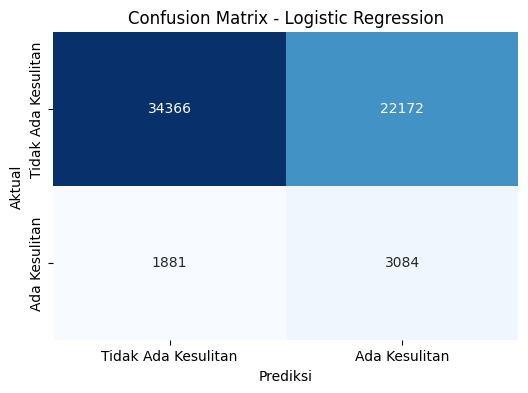

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], yticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], cbar=False)

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     56538
         1.0       0.12      0.62      0.20      4965

    accuracy                           0.61     61503
   macro avg       0.54      0.61      0.47     61503
weighted avg       0.88      0.61      0.70     61503



# Random Forest

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC: {auc_rf}")

AUC-ROC: 0.6337625360615327


In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

Akurasi: 0.9143944197844007


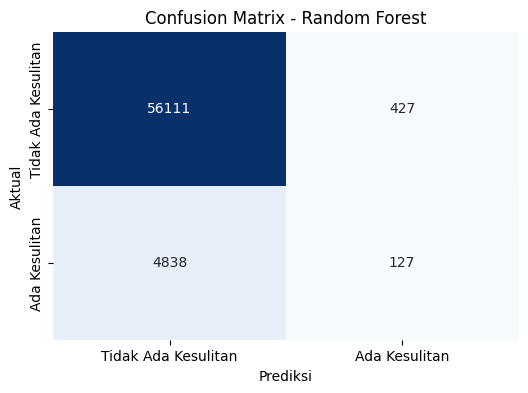

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], yticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], cbar=False)

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56538
         1.0       0.23      0.03      0.05      4965

    accuracy                           0.91     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503



**Extreme Gradient Boosting**

In [ ]:
# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:46:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Evaluate XGBoost model
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"AUC-ROC: {auc_xgb}")

AUC-ROC: 0.6347294284726895


In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred_xgb))

Akurasi: 0.9140854917646294


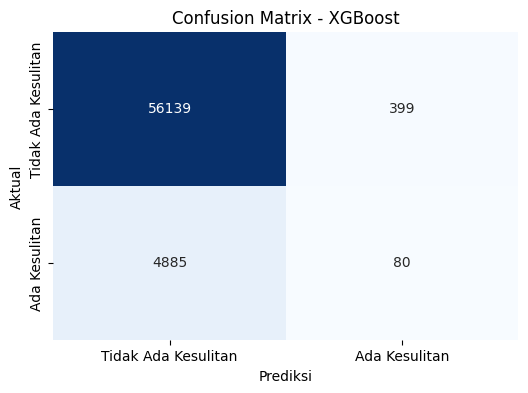

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], yticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], cbar=False)

plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56538
         1.0       0.17      0.02      0.03      4965

    accuracy                           0.91     61503
   macro avg       0.54      0.50      0.49     61503
weighted avg       0.86      0.91      0.88     61503

